## __2. (1.5 Puntos) Un laberinto__

Considere el problema de navegar en un laberinto que puede representarse como un arreglo bidimensional. En el laberinto existen algunas celdas que se consideran obstáculos y no es posible atravesarlas. Un agente que se encuentra en el laberinto puede moverse a cualquiera de las 8 celdas adyacentes siempre que la celda no sea un obstáculo y no esté por fuera de los límites del laberinto. En este caso, podemos representar la posición del agente como una coordenada $(x, y)$. Por ejemplo, la coordenada $(4,2$). Adicionalmente, las acciones pueden representarse como conjunto de parejas $(dx, dy)$ en el cual $dx$ representa la variación de la posición en $x$ y $dy$ representa la variación de la posición en $y$. Por ejemplo, $(0,-1)$ representa dejar la coordenada x tal como está y disminuir la actual coordenada en $y$ en una unidad. A continuación, se presenta el laberito en que se encuentra el agente:

<center>

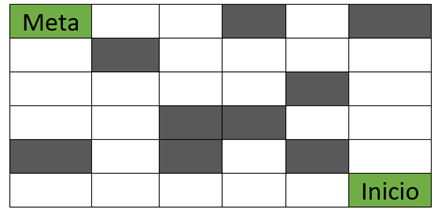

</center>
Para este problema:

* Modele este problema como un problema de búsqueda
* Implemente los algoritmos de búsquea UCS, Voraz y A* utilizando la distancia euclidiana como heurística y suponiendo que todos los movimientos cuestan 1 unidad.
* Compare la cantidad de nodos expandidos por UCS, Voraz y A*
* Construya una visualización para el laberinto, los obstaculos y la ruta encontrada. __Sugerencia__: Una forma de lograr esto es utilizar un mapa de calor.

In [2]:

from IPython.display import display
import ipywidgets as widgets
import time
import random
import math
from collections import defaultdict
import requests

# Clase para almacenar y dibujar el laberinto en un tablero
class Laberinto:
  # Inicializa los atributos básicos del laberinto
  def __init__(self, tamanoCelda=(40, 40), nCeldas=(6,6), filas=[]):
    self.out = widgets.HTML()
    display(self.out)
    self.tamanoCelda = tamanoCelda
    self.nCeldas = nCeldas
    self.filas = filas
    self.ruta = []

  # Con ayuda de los módulos imprime el estado del laberinto
  def dibujar(self, agente):
    tablero = "<table border='1'>{}</table>"
    fila = ""
    for i in range(self.nCeldas[0]):
      s = ""
      for j in range(self.nCeldas[1]):
        if (i,j) in self.ruta: # Si ya pasó por el lugar deja un rastro
            contenido = f"<div style='transform: rotate(0deg);font-size:35px;'>🟩</div>"
        elif (i,j) == agente: # Si el agente está en la casilla imprime el agente
            contenido = f"<div style='transform: rotate(0deg);font-size:35px;'>⚽</div>"
            self.ruta.append((i,j))
        elif self.filas[i][j] == "0": # Indica un camino libre
            contenido = f"<div style='transform: rotate(0deg);font-size:35px;'>⬜</div>"
        elif self.filas[i][j] == "1": # Indica un obstáculo
            contenido = f"<div style='transform: rotate(0deg);font-size:35px;'>🏃</div>"
        elif self.filas[i][j] == "2": # Indica la meta
            contenido = f"<div style='transform: rotate(deg);font-size:35px;'>🥅</div>"

        s += "<td style='height:{alto}px;width:{ancho}px'>{contenido}</td>".\
        format(alto=self.tamanoCelda[0], ancho=self.tamanoCelda[1],
               contenido=contenido)
      fila += "<tr>{}</tr>".format(s)
    tablero = tablero.format(fila)
    self.out.value=tablero



In [3]:
# Resuelve el laberinto utilizando DFS
class SolucionLaberinto:
    # Función para hallar la distancia por DFS
   def encuentraDistancia(self, matriz, inicio):
        #Inicializa variables para llamar a la función  laberinto DFS
        self.ruta = math.inf# Inicia el costo de la ruta desde infinito
        self.visitados = defaultdict(lambda: False) # Genera un arreglo con los lugares sin visitar
        self.matriz = matriz
        self.filas = len(matriz)
        self.columnas = len(matriz[0])
        self.laberintoUCS(inicio[0],inicio[1],0)
        return self.visitados, self.ruta # Devuelve en una tupla la lista de visitados

    #Función recursiva con el algoritmo búsqueda primero en profundidad
   def laberintoUCS(self, i, j, pasos):
        if i<0 or j<0 or i>=self.filas or j>=self.columnas: # Verifica que esté en el rango
            return
        elif self.matriz[i][j] == '1': # Esquiva el obstáculo
            return
        elif self.matriz[i][j] == '2': # Llega a la meta
            self.ruta = min(self.ruta,pasos)
            self.visitados[(i,j)]
            return True
        elif self.visitados[(i,j)]: # Verifica que ya haya sido visitado
            return

        self.visitados[(i,j)] = True #Marca el visitado

        # Emplea la recursividad
        self.laberintoUCS(i-1,j,pasos+1)
        self.laberintoUCS(i,j-1,pasos+1)
        self.laberintoUCS(i,j+1,pasos+1)
        self.laberintoUCS(i+1,j,pasos+1)

        return

In [4]:
# Desde un archivo en GITHUB recibe el contenido del laberinto
url = "https://raw.githubusercontent.com/juancarlostarazona/laberintoLab4/main/laberinto.txt"
page = requests.get(url)
lineas = []

# Genera un archivo txt temporal
with open ("/media/ArchivoLaberinto.txt", "w") as file:
  file.write(page.text)

# Lee y le da valores al arreglo lineas
with open ("/media/ArchivoLaberinto.txt") as file:
  columna = []
  for f in file:
    for x in f:
     if x == "\n":
       lineas.append(columna)
       columna = []
       continue
     if x != " ":
       columna.append(x)

# Crea una instancia tablero con la configuración inicial y una solucion
tablero = Laberinto(filas = lineas)
sol = SolucionLaberinto()
# Recibe el resultado de la solucion del laberinto
visitado, ruta = sol.encuentraDistancia(lineas,(5,5))

# Imprime los visitados hasta llegar a la meta
contador = 0

for x in visitado:
  tablero.dibujar(x)
  if lineas[x[0]][x[1]] == '2':
    time.sleep(1)
    tablero.dibujar(x)
    break
  contador += 1
  time.sleep(0.35)

print("La ruta hallada por UCS tiene un coste de: ", ruta)


HTML(value='')

La ruta hallada por UCS tiene un coste de:  10


In [5]:
# Resuelve el laberinto utilizando DFS
class SolucionLaberinto2:
   def encuentraDistancia2(self, matriz, inicio):
        #Inicializa variables para llamar a la función  laberinto DFS
        self.ruta = math.inf # Inicia el costo de la ruta desde infinito
        self.visitados = defaultdict(lambda: False) # Genera un arreglo con los lugares sin visitar
        self.matriz = matriz
        self.filas = len(matriz)
        self.columnas = len(matriz[0])
        self.laberintoVoraz(inicio[0],inicio[1],0)
        return self.visitados, self.ruta # Devuelve en una tupla la lista de visitados

   def laberintoVoraz(self, i, j, pasos):
        if i<0 or j<0 or i>=self.filas or j>=self.columnas: # Verifica que esté en el rango
            return
        elif self.matriz[i][j] == '1': # Esquiva el obstáculo
            return
        elif self.matriz[i][j] == '2': # Llega a la meta
            self.ruta = min(self.ruta,pasos)
            self.visitados[(i,j)]
            return True
        elif self.visitados[(i,j)]: # Verifica que ya haya sido visitado
            return

        self.visitados[(i,j)] = True #Marca el visitado

        # Emplea la recursividad
        self.laberintoVoraz(i-1,j-1,pasos+1)
        self.laberintoVoraz(i-1,j,pasos+1)
        self.laberintoVoraz(i,j-1,pasos+1)
        self.laberintoVoraz(i,j+1,pasos+1)
        self.laberintoVoraz(i+1,j,pasos+1)

        return

In [6]:
# Desde un archivo en GITHUB recibe el contenido del laberinto
url = "https://raw.githubusercontent.com/juancarlostarazona/laberintoLab4/main/laberinto.txt"
page = requests.get(url)
lineas = []

# Genera un archivo txt temporal
with open ("/media/ArchivoLaberinto.txt", "w") as file:
  file.write(page.text)

# Lee y le da valores al arreglo lineas
with open ("/media/ArchivoLaberinto.txt") as file:
  columna = []
  for f in file:
    for x in f:
     if x == "\n":
       lineas.append(columna)
       columna = []
       continue
     if x != " ":
       columna.append(x)

# Crea una instancia tablero con la configuración inicial y una solucion
tablero2 = Laberinto(filas = lineas)
sol2 = SolucionLaberinto2()
# Recibe el resultado de la solucion del laberinto
visitado2, ruta2 = sol2.encuentraDistancia2(lineas,(5,5))

# Imprime los visitados hasta llegar a la meta
contador2 = 0

for x in visitado2:
  tablero2.dibujar(x)
  if lineas[x[0]][x[1]] == '2':
    time.sleep(1)
    tablero2.dibujar(x)
    break
  contador2 += 1
  time.sleep(0.35)

print("La ruta hallada por UCS tiene un coste de: ", ruta2)

HTML(value='')

La ruta hallada por UCS tiene un coste de:  6


In [7]:
# Resuelve el laberinto utilizando DFS
class SolucionLaberinto3:
   def encuentraDistancia3(self, matriz, inicio):
        #Inicializa variables para llamar a la función  laberinto DFS
        self.ruta = math.inf # Inicia el costo de la ruta desde infinito
        self.visitados = defaultdict(lambda: False) # Genera un arreglo con los lugares sin visitar
        self.matriz = matriz
        self.filas = len(matriz)
        self.columnas = len(matriz[0])
        self.laberintoAEstrella(inicio[0],inicio[1],0)
        return self.visitados, self.ruta # Devuelve en una tupla la lista de visitados

   def laberintoAEstrella(self, i, j, pasos):
        if i<0 or j<0 or i>=self.filas or j>=self.columnas: # Verifica que esté en el rango
            return
        elif self.matriz[i][j] == '1': # Esquiva el obstáculo
            return
        elif self.matriz[i][j] == '2': # Llega a la meta
            self.ruta = min(self.ruta,pasos)
            self.visitados[(i,j)]
            return True
        elif self.visitados[(i,j)]: # Verifica que ya haya sido visitado
            return

        self.visitados[(i,j)] = True #Marca el visitado

        # Emplea la recursividad
        self.laberintoAEstrella(i-1,j-1,pasos+1)
        self.laberintoAEstrella(i-1,j,pasos+1)
        self.laberintoAEstrella(i,j-1,pasos+1)
        self.laberintoAEstrella(i-1,j,pasos+1)
        self.laberintoAEstrella(i,j-1,pasos+1)
        self.laberintoAEstrella(i,j+1,pasos+1)
        self.laberintoAEstrella(i+1,j,pasos+1)

        return

In [8]:
# Desde un archivo en GITHUB recibe el contenido del laberinto
url = "https://raw.githubusercontent.com/juancarlostarazona/laberintoLab4/main/laberinto.txt"
page = requests.get(url)
lineas = []

# Genera un archivo txt temporal
with open ("/media/ArchivoLaberinto.txt", "w") as file:
  file.write(page.text)

# Lee y le da valores al arreglo lineas
with open ("/media/ArchivoLaberinto.txt") as file:
  columna = []
  for f in file:
    for x in f:
     if x == "\n":
       lineas.append(columna)
       columna = []
       continue
     if x != " ":
       columna.append(x)

# Crea una instancia tablero con la configuración inicial y una solucion
tablero3 = Laberinto(filas = lineas)
sol3 = SolucionLaberinto3()
# Recibe el resultado de la solucion del laberinto
visitado3, ruta3 = sol3.encuentraDistancia3(lineas,(5,5))

# Imprime los visitados hasta llegar a la meta
contador3 = 0

for x in visitado3:
  tablero3.dibujar(x)
  if lineas[x[0]][x[1]] == '2':
    time.sleep(1)
    tablero3.dibujar(x)
    break
  contador3 += 1
  time.sleep(0.35)

print("La ruta hallada por UCS tiene un coste de: ", ruta2)

HTML(value='')

La ruta hallada por UCS tiene un coste de:  6
